In [1]:
#%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'png'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os
import pprint
import time
import copy
pp = pprint.PrettyPrinter()
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]


# Uncomment to enable matplotlib-D3.js integration -- enables zooming and panning of figures.
#import mpld3
#mpld3.enable_notebook()

# N-fold IP experiment plotter
``plotter(instance, method, gamma, gc_vals, main_logdir, symlog=True)``

- ``instance`` is a string such that the individual log files have the form ``<instance>_method_<method>_gamma_<gamma>.log``
- ``method`` is ``"ng1"`` or ``"nginfty"``
- ``gamma`` is ``"best"``, ``"logarithmic"`` or ``"unit"``
- ``gc_vals`` is a list of integers of values of g_1 to be plotted
- ``main_logdir`` is a string containing a path such that ``<main_logdir>`` contains a directory for each ``gamma``, and each of these directories contains a directory for each ``method``.
- ``symlog`` is a boolean indicating if the plot should have logarithmic y-axis

In [3]:
def plotter(instance, method, gamma, gc_vals, main_logdir, max_x = None, symlog=True,savefig=False):
    ### Get the data
    cwd = os.getcwd()
    name = instance+"_"+method+"_"+gamma+"_"
    logdir = main_logdir+"/"+gamma+"/"+method+"/"
    def getdata(gc_vals):
        os.chdir(logdir)
        d = defaultdict(list)
        for gc in gc_vals:
            data = open(name+str(gc)+".log", "r")
            for line in data.readlines():
                vals = line.split(" ")
                while "\n" in vals:
                    vals.remove("\n")
                vals = [int(v) for v in vals]
                #vals.sort()
                if vals:
                    d[gc].append(vals)
            data.close()
        os.chdir(cwd)
        return d
    
    start=time.time()
    
    d = getdata(gc_vals)
    d_keys = d.keys()
    d_keys.sort()
    
    dd = copy.deepcopy(d)
    ddd = copy.deepcopy(d)
    
    # Unpack each d[gc]
    for gc in d_keys:
        acc, acc2 = [], []
        for i in d[gc]:
            acc += i
            acc2 += [min(i)]*len(i)
        dd[gc] = acc
        ddd[gc] = acc2
    
    
    if max_x is None:
        max_iter = max(len(dd[gc]) for gc in dd)
    else:
        max_iter = max_x
    
    max_obj = max(max(dd[gc]) for gc in dd)
    min_obj = min(min(dd[gc]) for gc in dd)
    xs = np.arange(0, max_iter)
    ys = []
    for gc in d_keys:
        y = [[], []]
        for i in range(max_iter):
            if i < len(dd[gc]):
                y[0].append(min(ddd[gc][:i+1]))
                y[1].append(dd[gc][i])
            else:
                y[0].append(min(dd[gc]))
                y[1].append(min(dd[gc]))
        ys.append(y)
    
    cmap = plt.get_cmap('jet')


    for (gc,y) in zip(d_keys,ys):
        color = cmap((d_keys.index(gc))/float(len(d_keys)))
        # adding minus one because we always a) write initial obj, b) final obj
        total_iters = len(dd[gc]) - 1
        plt.fill_between(xs, y[0], y[1], color=color, alpha=0.3, label="g1="+str(gc)+" AugILP: " + str(total_iters))
        plt.plot(xs, y[0], color=color, alpha=0.7)

    plt.xlabel('iteration')
    plt.ylabel('objective')
    plt.ylim(min_obj-1,max_obj+100)
    if symlog:
        plt.gca().set_xscale('log')


    #plt.title("instance: " + instance + " method: " + method + " gamma: " + gamma)

    plt.legend()
    fig = plt.gcf()
    if savefig:
        fig.savefig(name+"clip_"+str(max_x)+".pdf", format='pdf', dpi=1000,bbox_inches="tight")
    plt.show()


## Results
- [Scheduling, ratio 0.60](#Scheduling,-ratio-0.60)
- [Scheduling, ratio 0.62](#Scheduling,-ratio-0.62)
- [Scheduling, ratio 0.70](#Scheduling,-ratio-0.70)
- [Scheduling, ratio 0.75](#Scheduling,-ratio-0.75)
- [Scheduling, longer jobs, ratio 0.45](#Scheduling,-longer-jobs,-ratio-0.45)
- [Scheduling, longer jobs, ratio 0.50](#Scheduling,-longer-jobs,-ratio-0.50)
- [Scheduling, longer jobs, ratio 0.55](#Scheduling,-longer-jobs,-ratio-0.55)
- [Scheduling, longer jobs, ratio 0.60](#Scheduling,-longer-jobs,-ratio-0.60)
- [Scheduling, longer jobs, ratio 0.65](#Scheduling,-longer-jobs,-ratio-0.65)
- [Closest String, binary, 5 strings, length 10000](#Closest-String,-binary,-5-strings,-length-10000)

### Scheduling, ratio 0.60
Parameters are: ``m=15``, ``lengths = [2,3,7,29]``, ``weights = [6,12,2,1]`` ``smallest=1000``, ``largest=5000``, ``slack_r=0.60``.

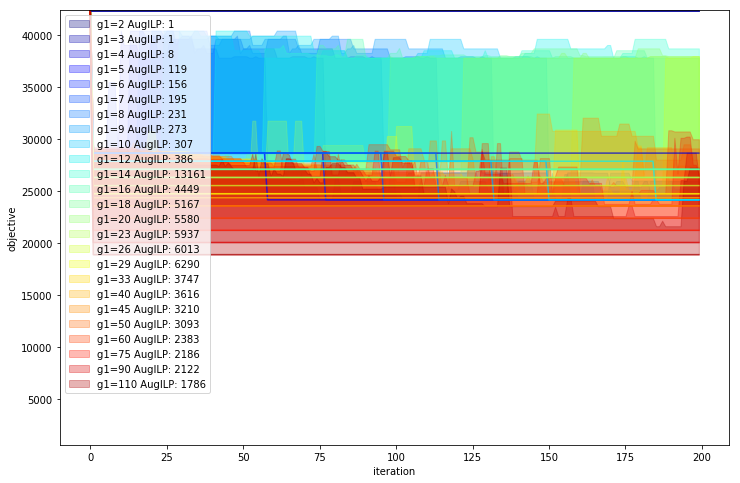

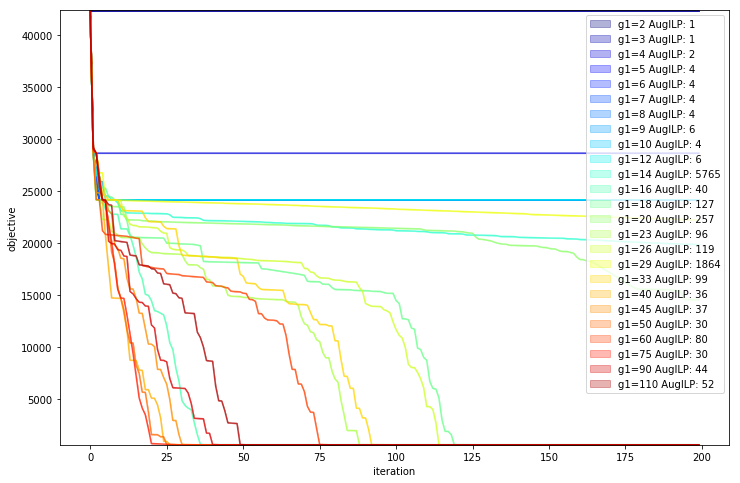

In [57]:
instance="QCmax_m_15_lengths_2_3_13_35_weigths_6_13_2_1_smallest_2000_largest_10000_slack_r_0.45_obj_total_length"
method = "ng1"
logdir = "./sched/logs/15_longer_r_45/"

gc_vals = [2,3,4,5,6,7,8,9,10,12,14,16,18,20,23,26,29,33,40,45,50,60,75,90,110]

for gamma in ["best", "logarithmic", "log5", "log10", "unit"]:
    plotter(instance, method, gamma, gc_vals, logdir,max_x=200, symlog=False,savefig=False)    

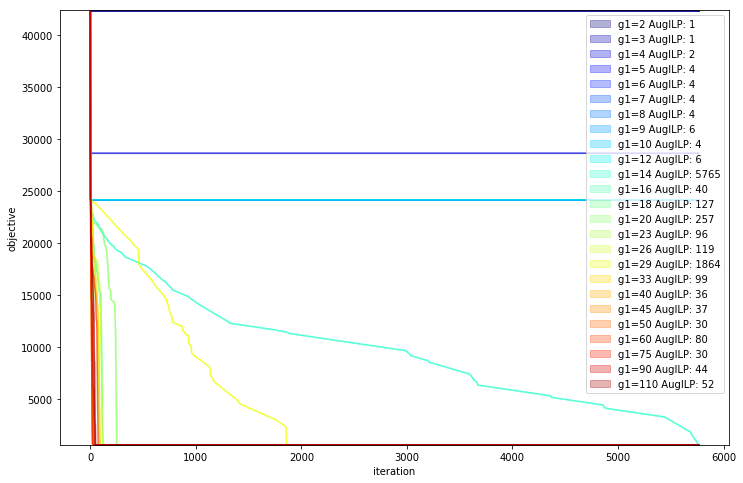

In [67]:
instance="QCmax_m_15_lengths_2_3_13_35_weigths_6_13_2_1_smallest_2000_largest_10000_slack_r_0.45_obj_total_length"
method = "ng1"
logdir = "./sched/logs/15_longer_r_45/"

gc_vals = [2,3,4,5,6,7,8,9,10,12,14,16,18,20,23,26,29,33,40,45,50,60,75,90,110]

for gamma in ["best", "logarithmic", "log5", "log10", "unit"]:
    plotter(instance, method, gamma, gc_vals, logdir,max_x=None, symlog=False,savefig=True)    

### Scheduling, ratio 0.62
Parameters are: ``m=15``, ``lengths = [2,3,7,23]``, ``weights = [6,13,2,1]`` ``smallest=1000``, ``largest=5000``, ``slack_r=0.62``.

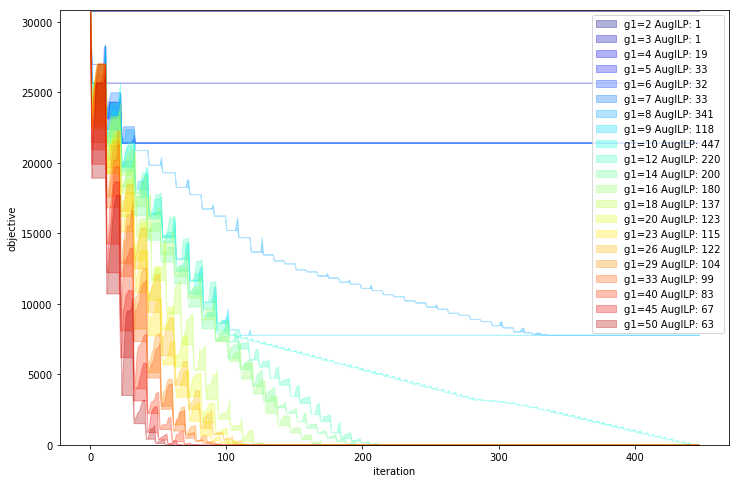

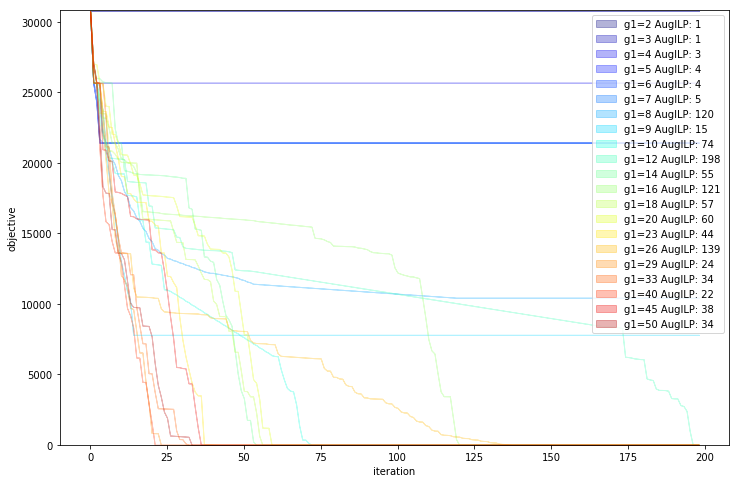

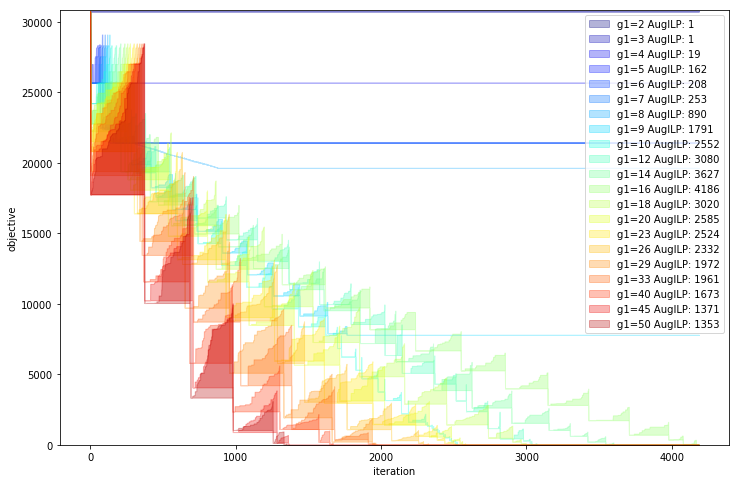

In [25]:
instance="QCmax_m_15_lengths_2_3_7_23_weigths_6_13_2_1_smallest_1000_largest_5000_slack_r_0.62_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_62/"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir,symlog=False)    

### Scheduling, ratio 0.70
Parameters are: ``m=15``, ``lengths = [2,3,7,23]``, ``weights = [6,13,2,1]`` ``smallest=1000``, ``largest=5000``, ``slack_r=0.7``.

We first clip to 50 iterations; next set of plots is without this clipping to exhibit why we need it and that $\Gamma_{\text{best}}$ avoids this issue here.

200


200


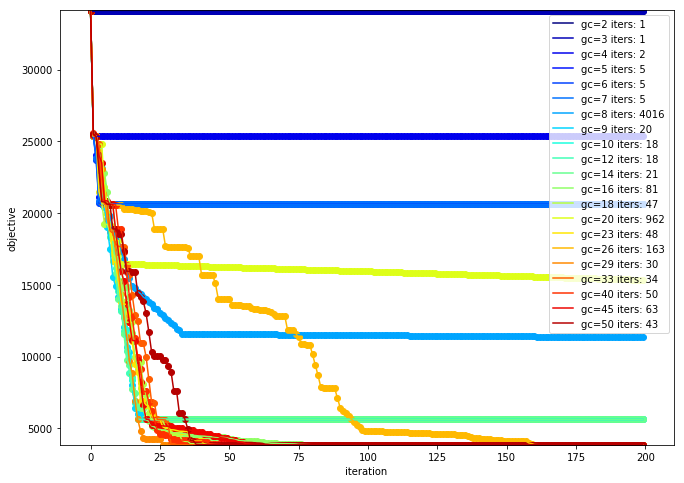

200


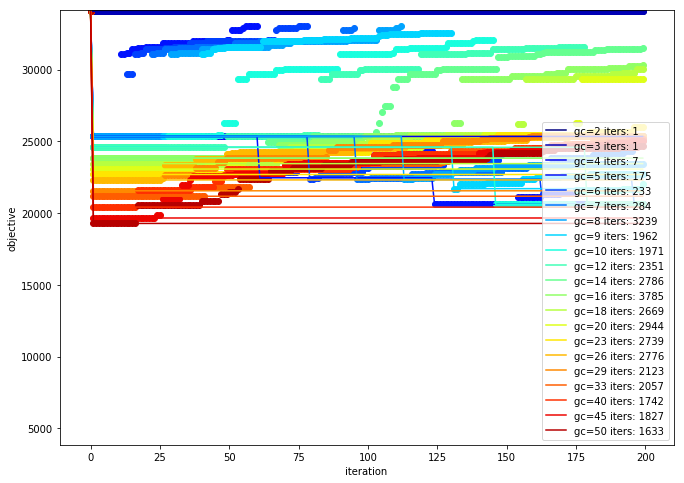

In [26]:
instance="QCmax_m_15_lengths_2_3_7_23_weigths_6_13_2_1_smallest_1000_largest_5000_slack_r_0.70_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_70/"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir, max_x=200, symlog=False)    

200


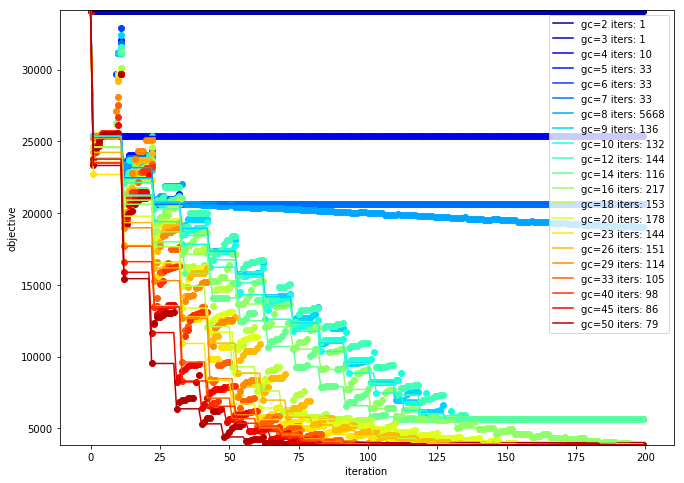

200


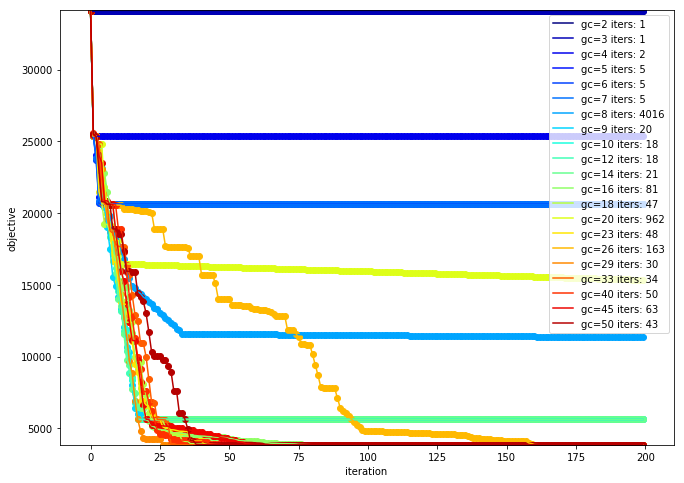

200


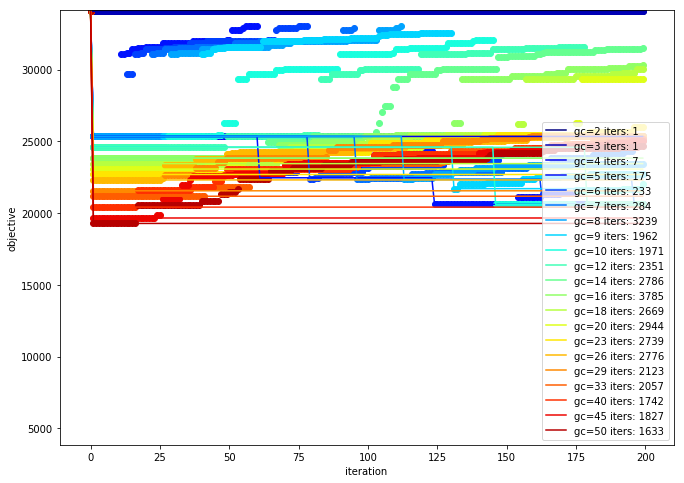

In [27]:
instance="QCmax_m_15_lengths_2_3_7_23_weigths_6_13_2_1_smallest_1000_largest_5000_slack_r_0.70_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_70/"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir, max_x=200, symlog=False)    

### Scheduling, ratio 0.75
Parameters are: ``m=15``, ``lengths = [2,3,7,23]``, ``weights = [6,13,2,1]`` ``smallest=1000``, ``largest=5000``, ``slack_r=0.75``.

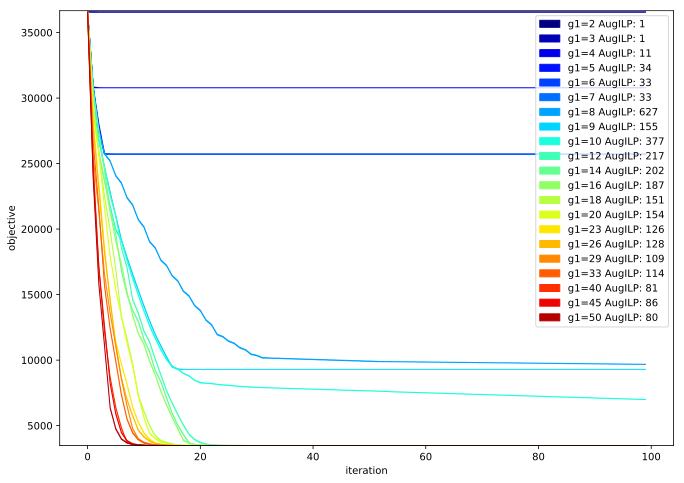

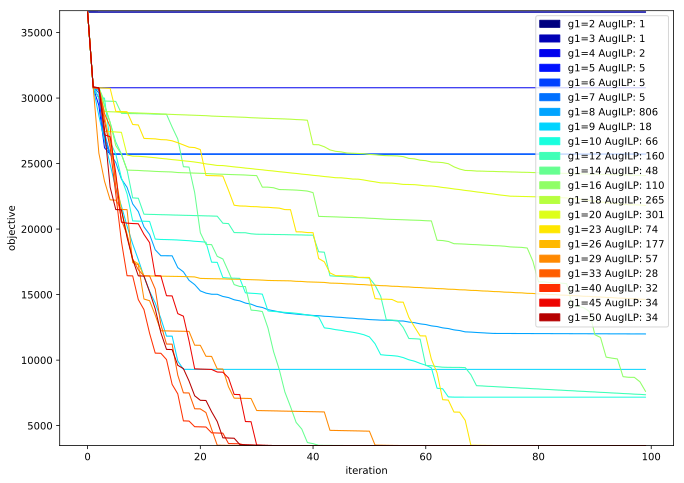

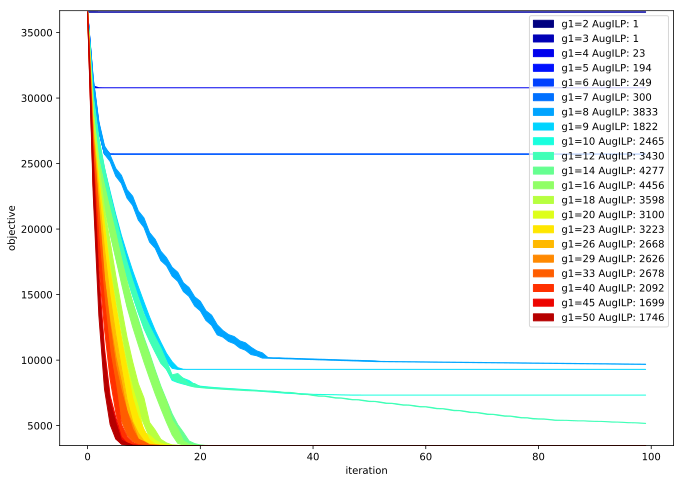

In [8]:
instance="QCmax_m_15_lengths_2_3_7_23_weigths_6_13_2_1_smallest_1000_largest_5000_slack_r_0.75_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_75/"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir, max_x = 100,symlog=False)    

### Scheduling, ratio 0.80
Parameters are: ``m=15``, ``lengths = [2,3,7,23]``, ``weights = [6,13,2,1]`` ``smallest=1000``, ``largest=5000``, ``slack_r=0.80``.

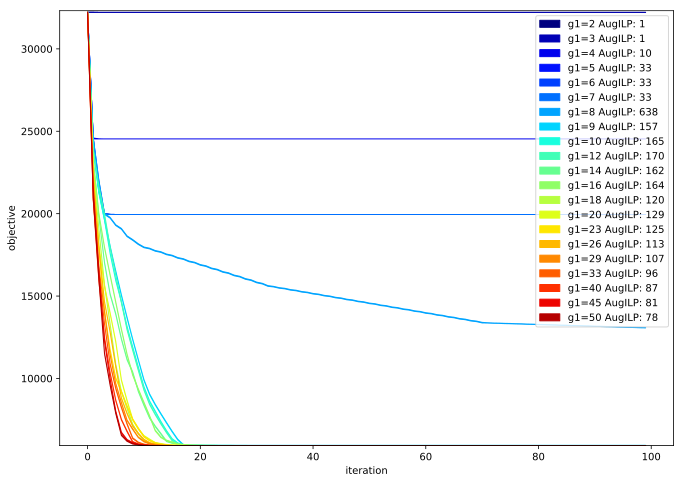

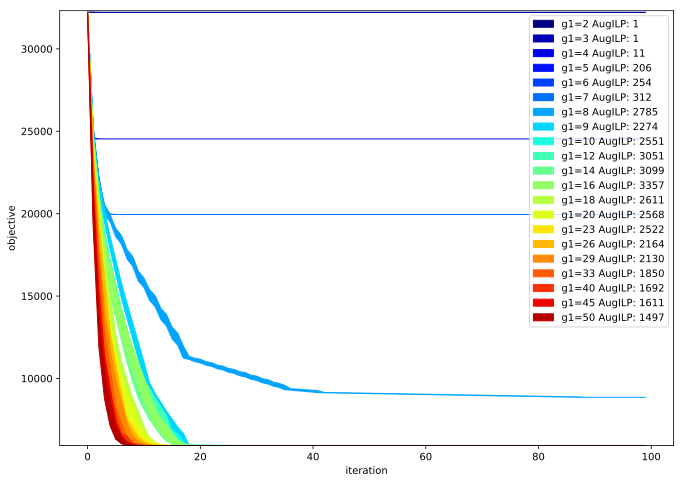

In [5]:
instance="QCmax_m_15_lengths_2_3_7_23_weigths_6_13_2_1_smallest_1000_largest_5000_slack_r_0.80_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_80/"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir, max_x = 100,symlog=False)    

### Scheduling, ratio 0.90
Parameters are: ``m=15``, ``lengths = [2,3,7,23]``, ``weights = [6,13,2,1]`` ``smallest=1000``, ``largest=5000``, ``slack_r=0.90``.

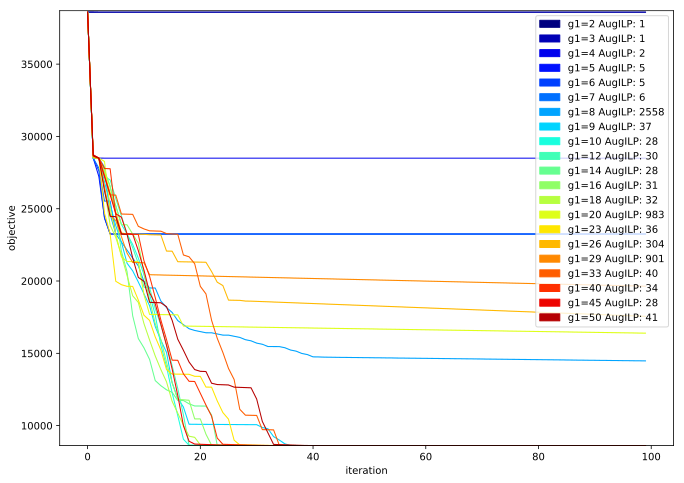

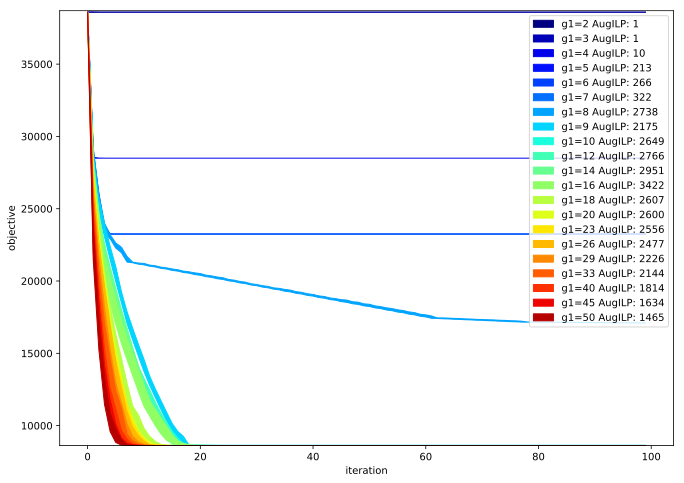

In [4]:
instance="QCmax_m_15_lengths_2_3_7_23_weigths_6_13_2_1_smallest_1000_largest_5000_slack_r_0.90_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_90/"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir, max_x = 100,symlog=False)    

### Closest String, binary, 5 strings, length 10000
Parameters are: ``k=5``, ``|$\Sigma$|=2``, ``L=10000``, ``r=1``.

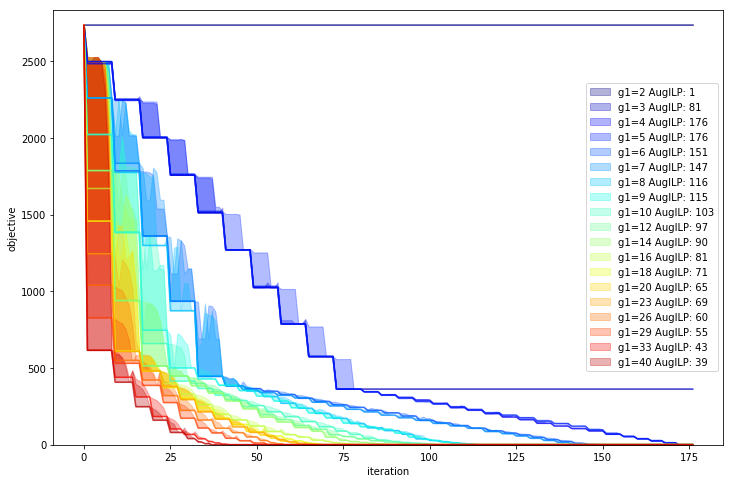

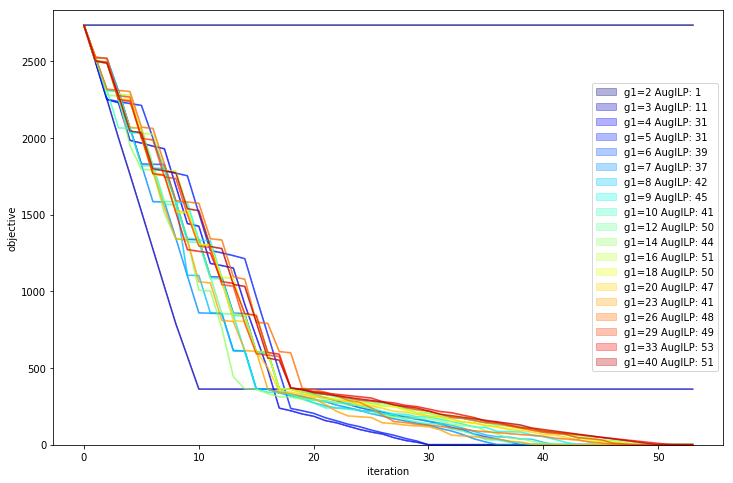

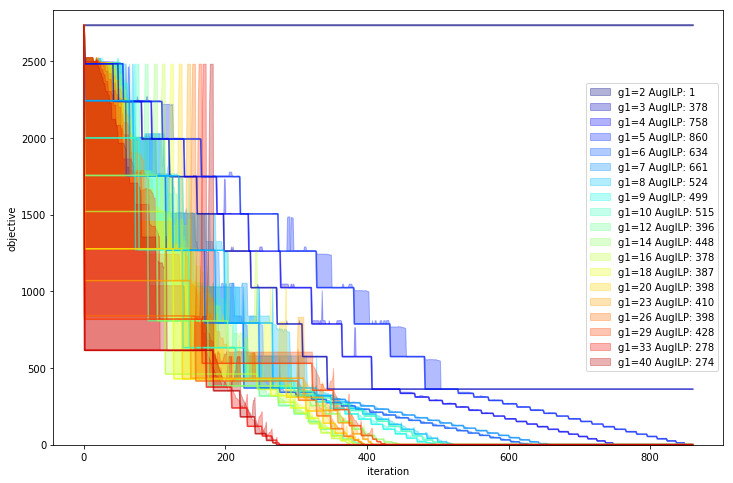

In [4]:
instance="2-5-10000-1-1.csp"
method = "ng1"
logdir = "./csp/2-5-10000-1-1_logs"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir,symlog=False)  

### Closest String, ternary, 3 strings, length 10000
Parameters are: ``k=3``, ``|$\Sigma$|=3``, ``L=10000``, ``r=1``.

In [68]:
instance="3-3-10000-1-1.csp"
method = "ng1"
logdir = "./csp/3-3-10000-1-1_logs"

gc_vals = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir,symlog=False)  

OSError: [Errno 2] No such file or directory: './csp/3-3-10000-1-1_logs/logarithmic/ng1/'